<a href="https://colab.research.google.com/github/MarcoParola/Aircraft_Pitch_Prediction_Challenge/blob/main/pitch_aileron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aircraft Pitch Prediction Challenge**

### link to Drive, import packages and define constants

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
from tensorflow.keras import optimizers, regularizers
import tensorflow as tf
import keras
from keras import layers
from sklearn import metrics 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


projectPath = 'drive/MyDrive/Colab Notebooks/pitch_aileron_kaggle/'
data_path = projectPath + 'data/'
training_set = data_path + 'train.csv'
test_set = data_path + 'test.csv'


earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                     mode='min', verbose=1, 
                                                     patience=10, 
                                                     restore_best_weights=True)


# setting matplotlib parameters
font = {'size'   : 13}
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (10,8)

Utility function to evaluate a regression model

In [ ]:
def evaluateRegressor(model, testset, actual):
  pred = model.predict(testset)
  resid = np.squeeze(actual) - np.squeeze(pred)
  
  print('R^2: ', metrics.r2_score(actual, pred), '\nMAE', metrics.mean_absolute_error(actual, pred))

  plt.plot([0.01, 0.055], [0.01, 0.055], c='orange', linewidth=4, alpha=.7)
  plt.scatter(np.squeeze(actual), np.squeeze(pred), s=5, alpha=.5)
  plt.title('Actual Damage Level vs Predicted values')
  plt.xlabel('Actual Damage Level')
  plt.ylabel('Predicted values')
  plt.show()

Dataset loading and preprocessing

In [ ]:
train = pd.read_csv(training_set, sep=',')
test = pd.read_csv(test_set, sep=',')

# I remove the columns 'DfST2' and 'DfST4' because all values are zero
train = train.drop(columns=['DfST2', 'DfST4'])
test = test.drop(columns=['DfST2', 'DfST4'])

# Store the target output in another variable
train_labels = train['Target']
train = train.drop(columns=['Target'])

# get ids of test set
test_ids = test['Id']
test = test.drop(columns=['Id'])

# max-min scalig
train = (train - train.min()) / (train.max() - train.min())
test = (test - train.min()) / (train.max() - train.min())

trainSplitted = train.iloc[:3600]
testSplitted = train.iloc[3600:]

trainLabelsSplitted = train_labels.iloc[:3600]
testLabelsSplitted = train_labels.iloc[3600:]

Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4851a6e110>,
      dtype=object)

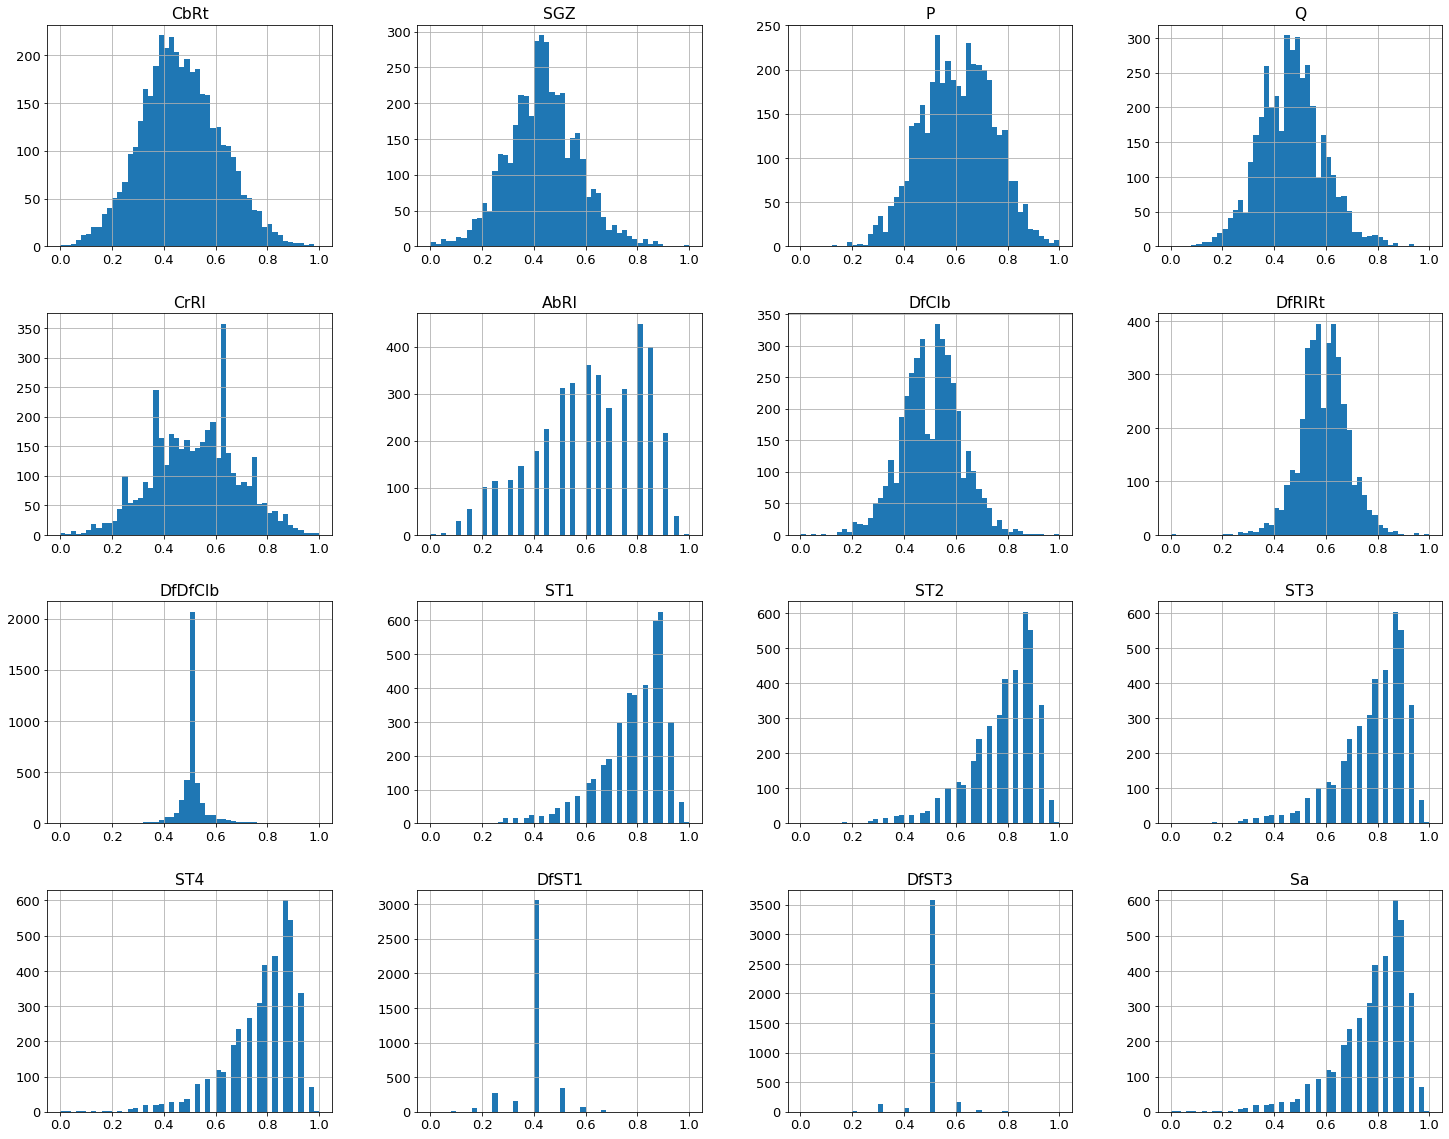

In [ ]:
train.hist(bins=50, figsize=(25, 20))

# Tensitng different architectures

## Test 1

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_8 (Dense)             (None, 32)                544       
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/180
24/24 [==============================] - 1s 9ms/step - loss: 0.0143 - accuracy: 0.0000e+00 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 2/180
24/24 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 0.0000e+00
Epoch 3/180
24/24 [======

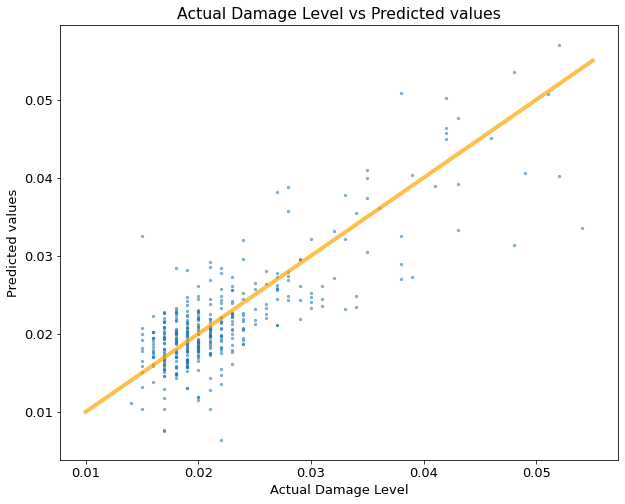

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(32, activation='tanh')(inputs)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainSplitted, trainLabelsSplitted, epochs=180, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testSplitted, testLabelsSplitted)

## Test 2

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_19 (Dense)            (None, 32)                544       
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                                 
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________
Epoch 1/180
24/24 [==============================] - 1s 16ms/step - loss: 0.3536 - accuracy: 0.0000e+00 - val_loss: 0.0161 - val_accuracy: 0.0000e+00
Epoch 2/180
24/24 [==============================] - 0s 4ms/step - loss: 0.0129 - accuracy: 0.0000e+00 - val_loss: 0.0090 - val_accuracy: 0.0000e+00
Epoch 3/180
24/24 [=====

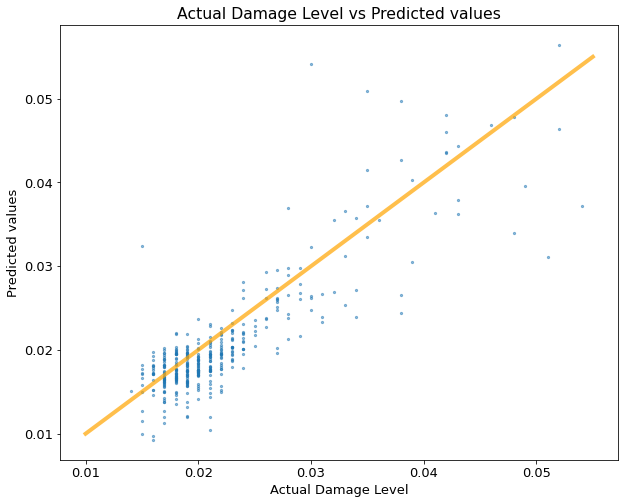

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(32, activation='relu')(inputs)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()

earlyStopCallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                     mode='min', verbose=1, 
                                                     patience=10, 
                                                     restore_best_weights=True)


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainSplitted, trainLabelsSplitted, epochs=180, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testSplitted, testLabelsSplitted)

## Test 3

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_16 (Dense)            (None, 64)                1088      
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_18 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,201
Trainable params: 3,201
Non-trainable

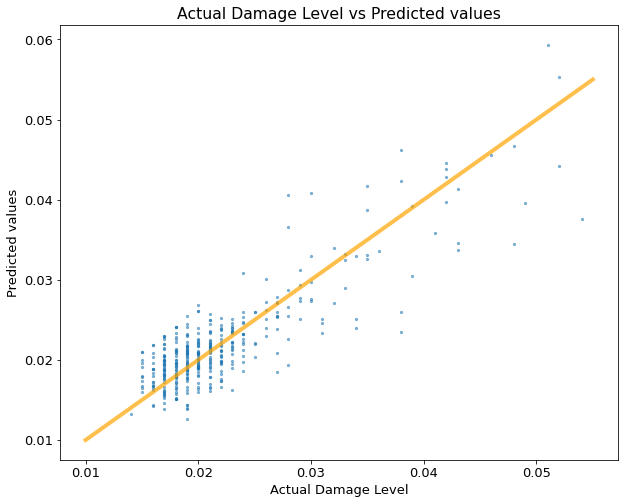

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(64, activation='tanh')(inputs)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(rate=0.2)(x)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainSplitted, trainLabelsSplitted, epochs=180, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testSplitted, testLabelsSplitted)

## Test 4

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_53 (Dense)            (None, 128)               2176      
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_54 (Dense)            (None, 32)                4128      
                                                                 
 dropout_32 (Dropout)        (None, 32)                0         
                                                                 
 dense_55 (Dense)            (None, 1)                 33        
                                                                 
Total params: 6,337
Trainable params: 6,337
Non-trainable

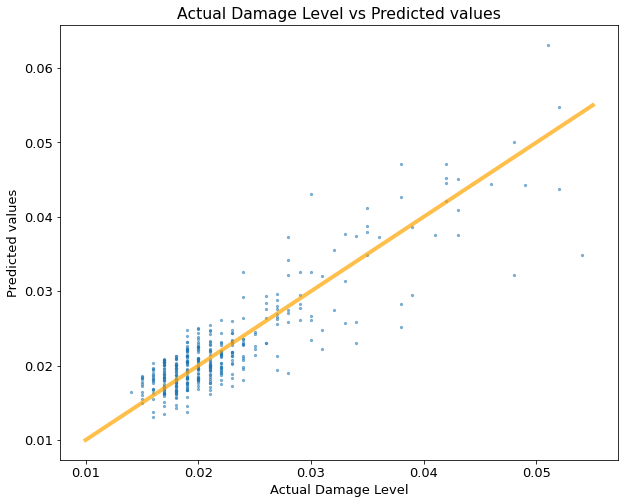

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(128, activation='tanh')(inputs)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(32, activation='tanh')(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainSplitted, trainLabelsSplitted, epochs=180, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testSplitted, testLabelsSplitted)

## Test 5

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 16)]              0         
                                                                 
 dense_24 (Dense)            (None, 128)               2176      
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_26 (Dense)            (None, 16)                1040      
                                                                 
 dropout_20 (Dropout)        (None, 16)                0 

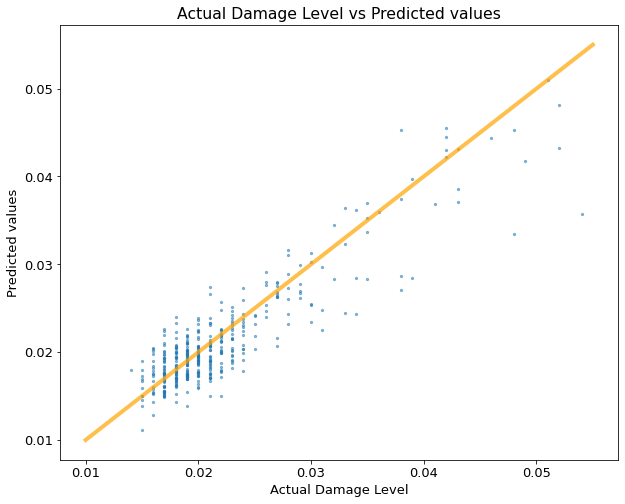

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(128, activation='tanh')(inputs)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(64, activation='tanh')(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(16, activation='tanh')(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(trainSplitted, trainLabelsSplitted, epochs=400, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.15)

evaluateRegressor(model, testSplitted, testLabelsSplitted)

# Make prediction using the model of the fifth test

In [ ]:
inputs = keras.Input(shape=(train.shape[1],))

x = layers.Dense(128, activation='tanh')(inputs)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(64, activation='tanh')(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(16, activation='tanh')(x)
x = layers.Dropout(rate=0.1)(x)
x = layers.Dense(1)(x)
model = keras.Model(inputs, x, name='regressor')
model.summary()


model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
history = model.fit(train, train_labels, shuffle=False, epochs=400, callbacks=[earlyStopCallback], batch_size=128, validation_split=0.1)

Model: "regressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_56 (Dense)            (None, 128)               2176      
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_57 (Dense)            (None, 64)                8256      
                                                                 
 dropout_43 (Dropout)        (None, 64)                0         
                                                                 
 dense_58 (Dense)            (None, 16)                1040      
                                                                 
 dropout_44 (Dropout)        (None, 16)                0 

make prediction and generate the submission file

In [ ]:
pred = model.predict(test)
df = pd.DataFrame({"Id":test_ids,"Target":np.squeeze(pred)})
df.set_index('Id', inplace=True)
df.to_csv(data_path + 'submission.csv', sep=',')